In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
def get_angles(position, k, d_model):
    """
    Computes a positional encoding for a word 
    
    Arguments:
        position (int): position of the word
        k (int): refers to each of the different dimensions in the positional encodings, with i equal to k//2
        d_model(int): the dimension of the word embedding and positional encoding
    
    Returns:
        _ (float): positional embedding value for the word
    """
    i = k // 2
    angle_rates = 1 / np.power(10000, (2 * i) / np.float32(d_model))
    return position * angle_rates

In [3]:
def positional_encoding(positions, d):
    """
    Precomputes a matrix with all the positional encodings 
    
    Arguments:
        positions (int): Maximum number of positions to be encoded 
        d (int): Encoding size 
    
    Returns:
        pos_encoding (tf.Tensor): A matrix of shape (1, position, d_model) with the positional encodings
    """
    # initialize a matrix angle_rads of all the angles 
    angle_rads = get_angles(np.arange(positions)[:, np.newaxis],
                          np.arange(d)[np.newaxis, :],
                          d)
  
    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
    pos_encoding = angle_rads[np.newaxis, ...]
    
    return tf.cast(pos_encoding, dtype=tf.float32)

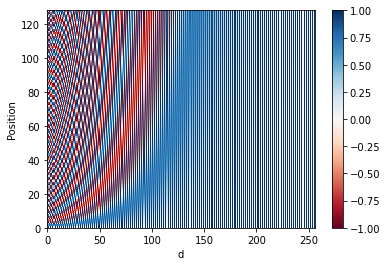

In [6]:
pos_encoding = positional_encoding(128, 256)

plt.pcolormesh(pos_encoding[0], cmap='RdBu')
plt.xlabel('d')
plt.xlim((0, 256))
plt.ylabel('Position')
plt.colorbar()
plt.show()